In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
b = cv2.imread('../calibration_images/base.png')
a = cv2.imread('../calibration_images/x_im12.png')

a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY).astype(np.float32)
b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY).astype(np.float32)

b /= np.mean(b)
a /= np.mean(a)

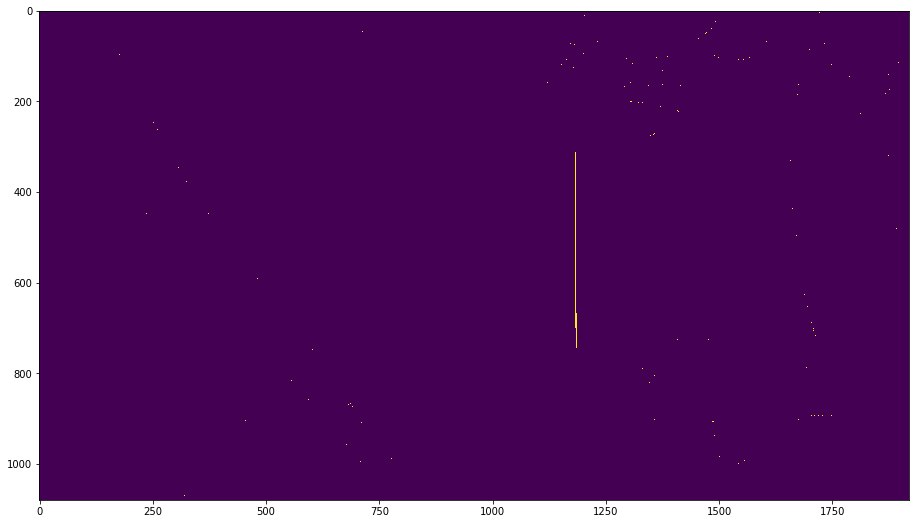

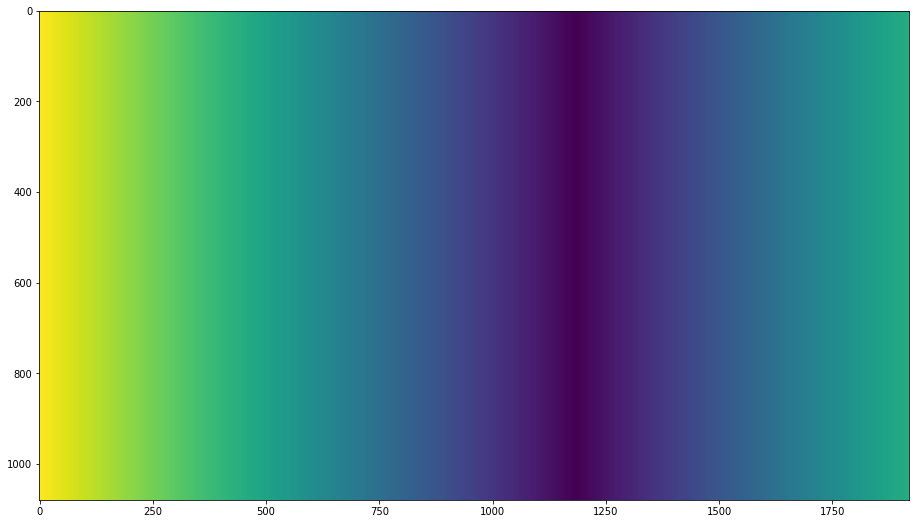

In [52]:
plt.figure(figsize=[16,9])
plt.imshow(np.clip(a - b, 0, 10) > 0.1)

rho, theta = cv2.HoughLines((a - b > 0.1).astype(np.uint8), 1, np.pi / 180, 100, lines=1)[0, 0]

add_bright = np.clip(a - b, 0, 10)

inds = np.transpose(np.indices(add_bright.shape), [1, 2, 0])
inds = np.matmul(inds, rot(theta))

plt.figure(figsize=[16,9])
plt.imshow(np.abs(inds[:, :, 1] - rho))

add_bright[np.abs(inds[:, :, 1] - rho) > 5] = 0

In [ ]:
def rot(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)],
    ])

In [29]:
theta_res, rho_res = 180, 1.0
hough = henry_hough(np.stack(np.where(a - b > 0.02), 1), (a - b)[a - b > 0.02], theta_res, rho_res)
theta_ind, rho_ind = np.unravel_index(np.argmax(hough), hough.shape)
theta = np.pi * theta_ind / theta_res
rho = rho_ind - ((hough.shape[1] - 1) / 2) * rho_res
theta, rho

in_line = buffer(np.stack(np.where(a - b > 0.1), 1), theta, rho, 4)
np.stack(np.where(a - b > 0.1), 1)[in_line]

NameError: name 'henry_hough' is not defined

In [135]:
theta, rho

(0.0, -648.0)

In [139]:
cv2.imwrite('hough.png', hough / np.max(hough) * 255 * 1)

True